# Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display

import numpy as np
import pandas as pd

from word2vec_as_EMF import word2vec_as_EMF
from functions import *

# Load model

In [2]:
model_enwik = word2vec_as_EMF()
model_enwik.load_matrices(from_file='enwik-200/matrices.npz')
datasets_path='datasets'

# Experiments

In [3]:
from_folder = 'enwik-200/PS800iter_fromSVD_factors'
MAX_ITER = 800

CPU times: user 11min 7s, sys: 2min 42s, total: 13min 50s
Wall time: 14min 25s


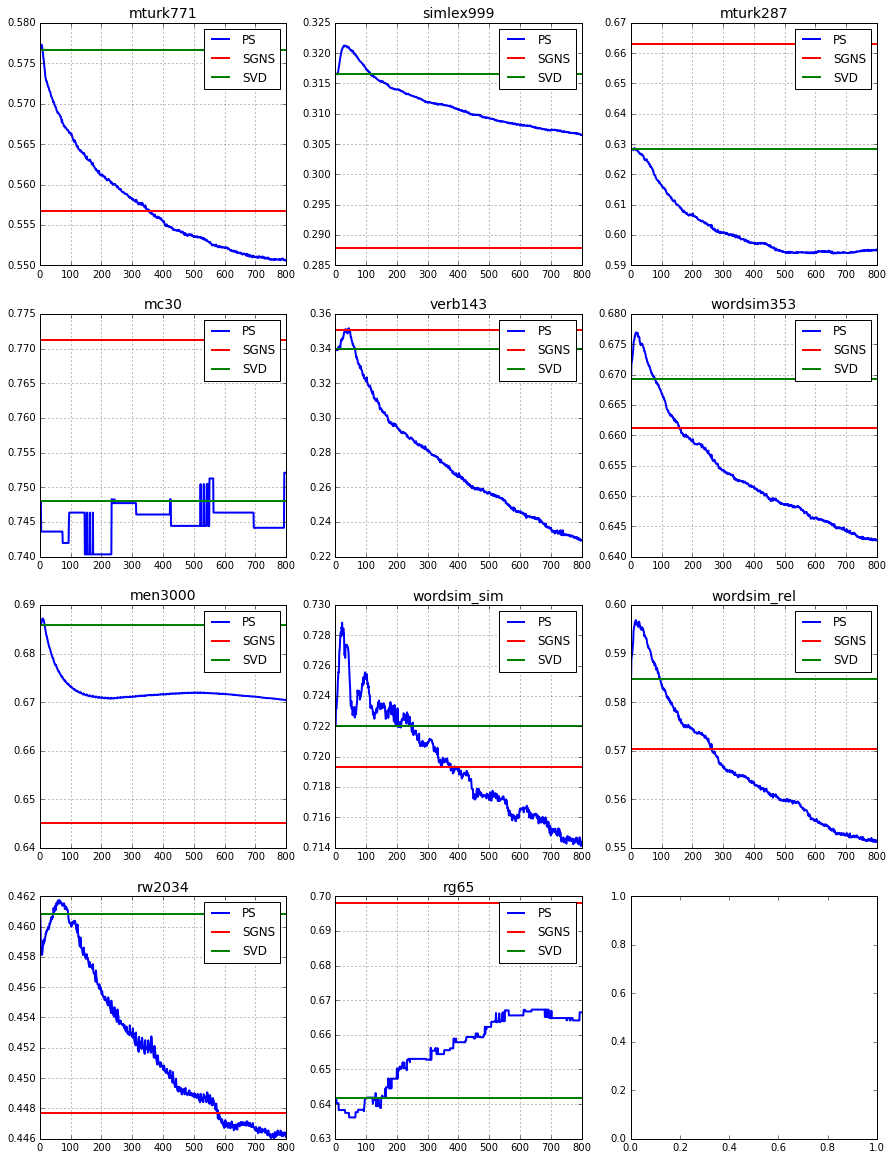

In [4]:
%%time
PS800_ds_corrs = datasets_corr(model_enwik, datasets_path, from_folder, MAX_ITER=MAX_ITER, plot_corrs=True)

In [5]:
from_folder = 'enwik-200/AM100iter_fromSVD_factors'
MAX_ITER = 200

CPU times: user 2min 59s, sys: 37.6 s, total: 3min 37s
Wall time: 3min 38s


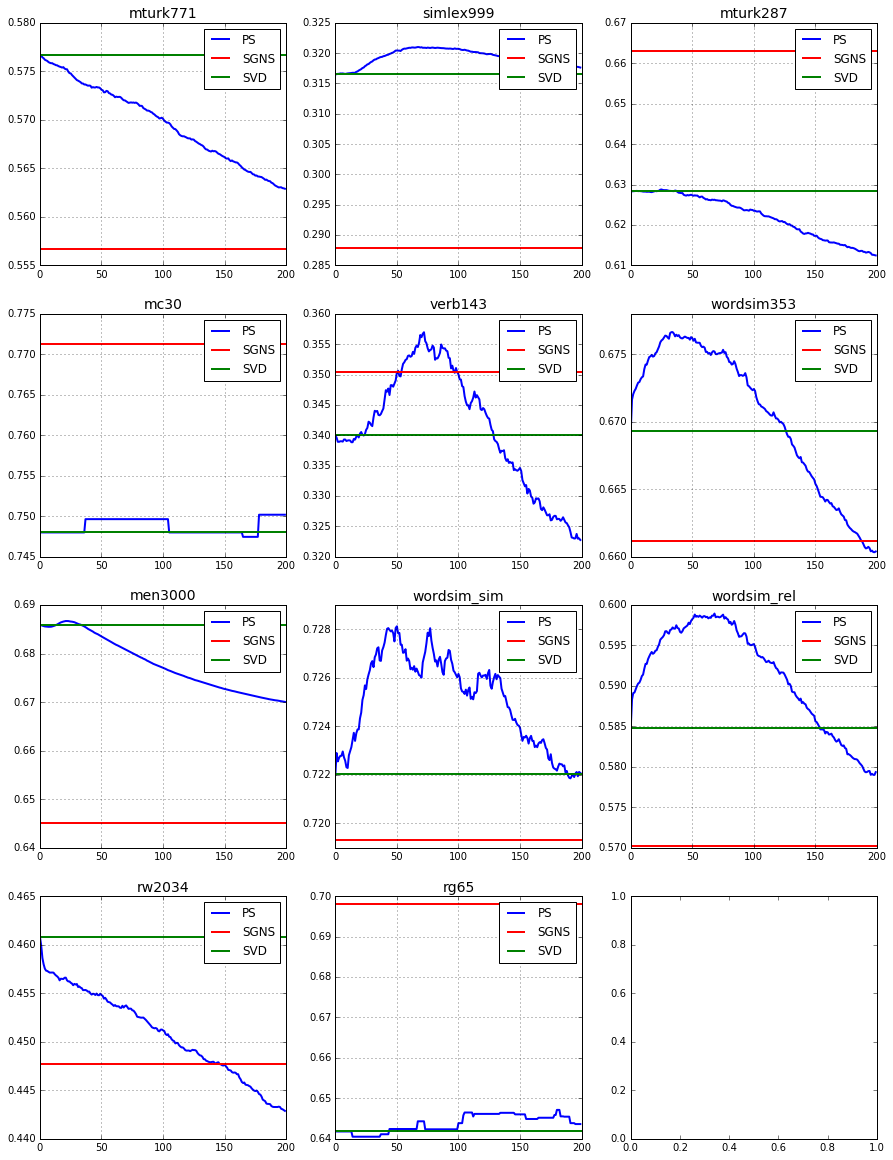

In [7]:
%%time
AM200_ds_corrs = datasets_corr(model_enwik, datasets_path, from_folder, MAX_ITER=MAX_ITER, plot_corrs=True)

## Word similarity

In [78]:
# Find indices of all words, appeared in WS datasets

import os
names = []
arrs = []
for filename in os.listdir('datasets'):
    
    if filename[-4:]=='.csv':

        name = filename[:-4]
        for i in xrange(3):
            names.append(str(i)+name)
        
        dataset = pd.read_csv('datasets/'+filename, header=None, delimiter=';').values
        ind1 = []
        ind2 = []
        vec2 = []
        model_dict=model_enwik.dictionary
        for i in xrange(dataset.shape[0]):
            word1 = dataset[i, 0].lower()
            word2 = dataset[i, 1].lower()
            if (word1 in model_dict and word2 in model_dict):
                ind1.append(int(model_dict[word1]))
                ind2.append(int(model_dict[word2]))
                vec2.append(np.float64(dataset[i, 2]))
                
        ind1 = np.array(ind1)
        ind2 = np.array(ind2)
        vec2 = np.array(vec2)
        
        arrs.append(ind1)
        arrs.append(ind2)
        arrs.append(vec2)
        
np.savez(open('datasets/indices.npz', 'wb'), **{name:value for name,value in zip(names, arrs)})